<a href="https://colab.research.google.com/github/jaykkim1/Art048_NN_DAE/blob/main/%5BWork%5D_Deep_Basin_%EC%83%9D%EC%82%B0%EB%9F%89_%EC%98%88%EC%B8%A1_ver15_just%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# '23.7.12 현재 최종본 (업데이트 시 별도 사본으로 저장요)

In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터로딩/검토/전처리

In [ ]:
df = pd.read_excel(r"DBP_Data_Transformed.xlsx")

In [ ]:
# column 제목 공백 --> 언더바 변환
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
# 일산량 --> 월산량 변환
df['Monthly_Gas_Prod(Mcf)'] = df['Gas_Prod(Mcf/d)']/24*df['Prod_Hour(hr)'] # 시간당 생산량 * 월간 생산시간
df['Monthly_Oil_Prod(bbl)'] = df['Oil_Prod(bbl/d)']/24*df['Prod_Hour(hr)'] # 시간당 생산량 * 월간 생산시간

In [ ]:
# 2-stream 월산량 계산
df['Monthly_2stream(boe)'] = df['Monthly_Gas_Prod(Mcf)']/6 + df['Monthly_Oil_Prod(bbl)']

In [ ]:
# 12/24/36개월 누적 생산시간 계산
df['12M_Prod_Hour(hr)'] = df.groupby(['Well_Number'])['Prod_Hour(hr)'].transform(lambda x: x.iloc[:12].sum())
df['24M_Prod_Hour(hr)'] = df.groupby(['Well_Number'])['Prod_Hour(hr)'].transform(lambda x: x.iloc[:24].sum())
df['36M_Prod_Hour(hr)'] = df.groupby(['Well_Number'])['Prod_Hour(hr)'].transform(np.sum)


In [ ]:
# 12/24/36개월 누적 생산량 계산 (2stream)
df['12M_2stream(boe)'] = df.groupby(['Well_Number'])['Monthly_2stream(boe)'].transform(lambda x: x.iloc[:12].sum())
df['24M_2stream(boe)'] = df.groupby(['Well_Number'])['Monthly_2stream(boe)'].transform(lambda x: x.iloc[:24].sum())
df['36M_2stream(boe)'] = df.groupby(['Well_Number'])['Monthly_2stream(boe)'].transform(np.sum)


# # 12/24/36개월 누적 생산량 계산 (GAS)
# df['12M_Gas(mcf)'] = df.groupby(['Well_Number'])['Monthly_Gas_Prod(Mcf)'].transform(lambda x: x.iloc[:12].sum())
# df['24M_Gas(mcf)'] = df.groupby(['Well_Number'])['Monthly_Gas_Prod(Mcf)'].transform(lambda x: x.iloc[:24].sum())
# df['36M_Gas(mcf)'] = df.groupby(['Well_Number'])['Monthly_Gas_Prod(Mcf)'].transform(np.sum)

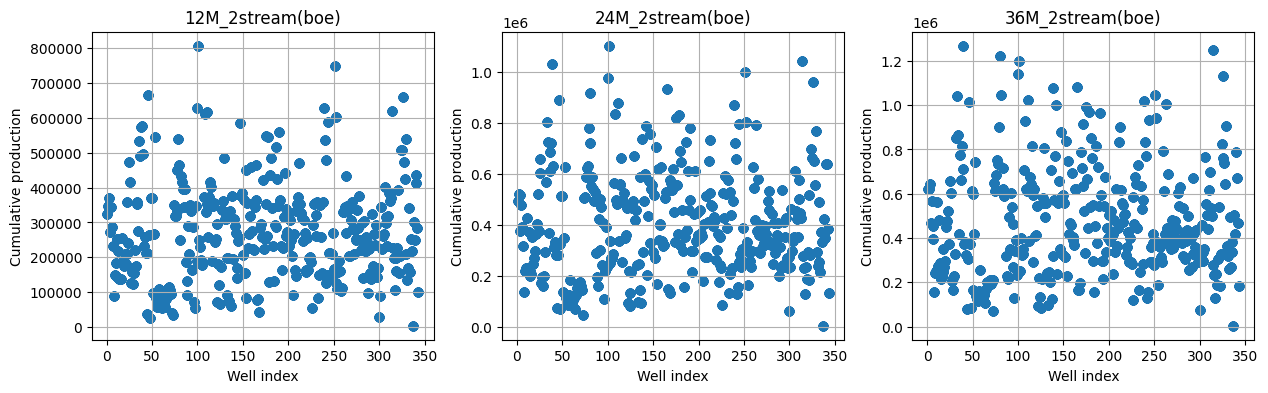

In [ ]:
prod = ['12M_2stream(boe)','24M_2stream(boe)','36M_2stream(boe)']
# prod = ['12M_Gas(mcf)','24M_Gas(mcf)','36M_Gas(mcf)']



fig, ax = plt.subplots(1,3, figsize=(15,4))

for i in range(3):
  ax[i].scatter(df['Well_Number'], df[prod[i]])
  ax[i].set_title(prod[i])
  ax[i].set_xlabel('Well index')
  ax[i].set_ylabel('Cumulative production')
  ax[i].grid()
plt.show()

In [ ]:
summary = pd.DataFrame(df.dtypes, columns= ['Dtype'])
summary['Null'] = df.isnull().sum()
summary['N_unique'] = df.nunique()
summary['1st_Value'] = df.iloc[0]
summary['2nd_Value'] = df.iloc[1]
summary['Last_Value'] = df.iloc[-1]
summary

,Dtype,Null,N_unique,1st_Value,2nd_Value,Last_Value
Well_Number,int64,0,343,1,1,343
Gas_Prod(Mcf/d),float64,0,9523,4310.1,5404.4,230.2
Oil_Prod(bbl/d),float64,0,4657,44.1,0.0,38.6
Prod_Hour(hr),int64,0,690,600,744,700
Time(month),int64,0,36,1,2,36
Reference_(KB)_Elev._(ft),int64,0,147,2908,2908,2564
Ground_Elevation_(ft),int64,0,139,2888,2888,2547
MD_(All_Wells)_(ft),int64,0,299,20325,20325,17421
TVD_(ft),int64,0,306,10015,10015,9371
Bot-Hole_direction_(N/S)/(E/W),float64,0,343,0.834538,0.834538,0.614055


In [ ]:
# 불필요한 행/열 삭제

#1. 행 삭제: 월별 정보
workingdf = df.loc[df['Time(month)']==36]

#2. 열 삭제
workingdf = workingdf.drop(labels = 'Gas_Prod(Mcf/d)', axis=1)
workingdf = workingdf.drop(labels = 'Oil_Prod(bbl/d)', axis=1)
workingdf = workingdf.drop(labels = 'Prod_Hour(hr)', axis=1)
workingdf = workingdf.drop(labels = 'Time(month)', axis=1)
workingdf = workingdf.drop(labels = 'Monthly_Gas_Prod(Mcf)', axis=1)
workingdf = workingdf.drop(labels = 'Monthly_Oil_Prod(bbl)', axis=1)
workingdf = workingdf.drop(labels = 'Monthly_2stream(boe)', axis=1)

In [ ]:
# 생산량 비율 계산
workingdf['24/12M_Prod_2stream'] = workingdf['24M_2stream(boe)']/workingdf['12M_2stream(boe)']
workingdf['36/24M_Prod_2stream'] = workingdf['36M_2stream(boe)']/workingdf['24M_2stream(boe)']

In [ ]:
# 생산시간 비율 계산
workingdf['24/12M_Prod_hr'] = workingdf['24M_Prod_Hour(hr)']/workingdf['12M_Prod_Hour(hr)']

# 파쇄구간 대비 생산량 비율 계산
workingdf['24M_Prod/Completed_Length(boe/m)'] = workingdf['24M_2stream(boe)']/workingdf['Completed_Length_(m)']

# 프로판트 양 대비 생산량 비율 계산
workingdf['24M_Prod/Total_Proppant_Placed_(tonne)'] = workingdf['24M_2stream(boe)']/workingdf['Total_Proppant_Placed_(tonne)']



In [ ]:
summary = pd.DataFrame(workingdf.dtypes, columns= ['Dtype'])
summary['Null'] = workingdf.isnull().sum()
summary['N_unique'] = workingdf.nunique()
summary['1st_Value'] = workingdf.iloc[0]
summary['2nd_Value'] = workingdf.iloc[1]
summary['Last_Value'] = workingdf.iloc[-1]
summary

,Dtype,Null,N_unique,1st_Value,2nd_Value,Last_Value
Well_Number,int64,0,343,1,2,343
Reference_(KB)_Elev._(ft),int64,0,147,2908,2910,2564
Ground_Elevation_(ft),int64,0,139,2888,2889,2547
MD_(All_Wells)_(ft),int64,0,299,20325,20456,17421
TVD_(ft),int64,0,306,10015,10213,9371
Bot-Hole_direction_(N/S)/(E/W),float64,0,343,0.834538,0.847738,0.614055
Bot-Hole_Easting_(NAD83),float64,0,341,0.82466,0.828924,0.471519
Bot-Hole_Northing_(NAD83),float64,0,343,0.006075,0.009651,1.0
Stimulation_Fluid,object,0,22,Slickwater,Slickwater,Oil: HAL-My-T-Oil
Total_Proppant_Placed_(tonne),float64,0,338,5821.72,6091.64,962.0


# Feature selection/Outlier removal

In [ ]:
workingdf.columns

Index(['Well_Number', 'Reference_(KB)_Elev._(ft)', 'Ground_Elevation_(ft)',
       'MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Bot-Hole_direction_(N/S)/(E/W)',
       'Bot-Hole_Easting_(NAD83)', 'Bot-Hole_Northing_(NAD83)',
       'Stimulation_Fluid', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Avg_Frac_Spacing_(m)', 'Load_Fluid_Rec_(m3)',
       'Load_Fluid_(m3)', 'Avg_Fluid_Pumped_/_Meter_(m3)',
       'Avg_Proppant_Placed_/_Meter_(tonne)', 'Proppant_Composition',
       'Proppant_Name_1', 'Proppant_Size_1', 'Avg_Proppant_1_Placed_(tonne)',
       'Total_Proppant_1_Placed_(tonne)',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
       '24M_Prod_Hour(hr)', '36M_Prod_Hour(hr)', '12M_2stream(boe)',
       '24M_2stream(boe)', '36M_2stream(boe)', '24/12M_Prod_2stream',
       '3

In [ ]:
# # 상관도 히트맵

# import seaborn as sns
# workingdf_heat = workingdf[['Reference_(KB)_Elev._(ft)', 'Ground_Elevation_(ft)',
#        'MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Bot-Hole_direction_(N/S)/(E/W)',
#        'Bot-Hole_Easting_(NAD83)', 'Bot-Hole_Northing_(NAD83)',
#        'Stimulation_Fluid', 'Total_Proppant_Placed_(tonne)',
#        'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
#        'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
#        'Completed_Length_(m)', 'Avg_Frac_Spacing_(m)', 'Load_Fluid_Rec_(m3)',
#        'Load_Fluid_(m3)', 'Avg_Fluid_Pumped_/_Meter_(m3)',
#        'Avg_Proppant_Placed_/_Meter_(tonne)', 'Proppant_Composition',
#        'Avg_Proppant_1_Placed_(tonne)',
#        'Total_Proppant_1_Placed_(tonne)',
#        'Total_Ceramic_Proppant_Placed_(tonne)',
#        'Total_Sand_Proppant_Placed_(tonne)', '36M_2stream(boe)','12M_2stream(boe)',
#        '24M_2stream(boe)', '36M_Prod_Hour(hr)']]

# corr = workingdf_heat.corr(method='pearson')
# upp_mat = np.triu(workingdf_heat.corr()) #하단의 heatmap에서 지정안할거면 필요없음
# sns.set(font_scale = 0.9)
# sns.set_style("white")
# plt.figure(figsize=(18, 15))
# sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f") #cmap='Reds',linewidths=0.5,
# plt.show()

In [ ]:
workingdf.reset_index(drop=True, inplace= True)
workingdf


,Well_Number,Reference_(KB)_Elev._(ft),Ground_Elevation_(ft),MD_(All_Wells)_(ft),TVD_(ft),Bot-Hole_direction_(N/S)/(E/W),Bot-Hole_Easting_(NAD83),Bot-Hole_Northing_(NAD83),Stimulation_Fluid,Total_Proppant_Placed_(tonne),...,24M_Prod_Hour(hr),36M_Prod_Hour(hr),12M_2stream(boe),24M_2stream(boe),36M_2stream(boe),24/12M_Prod_2stream,36/24M_Prod_2stream,24/12M_Prod_hr,24M_Prod/Completed_Length(boe/m),24M_Prod/Total_Proppant_Placed_(tonne)
0,1,2908,2888,20325,10015,0.834538,0.824660,0.006075,Slickwater,5821.72,...,16752,24747,325171.225000,494362.909722,619140.623611,1.520316,1.252401,2.045921,167.711405,84.916985
1,2,2910,2889,20456,10213,0.847738,0.828924,0.009651,Slickwater,6091.64,...,16201,24080,346443.177778,520510.604861,623266.352083,1.502441,1.197413,2.135082,175.645236,85.446711
2,3,2911,2888,20453,10221,0.913735,0.844094,0.024075,Slickwater,6322.70,...,14198,22303,369026.294444,517232.452083,642656.570139,1.401614,1.242491,1.996344,175.669486,81.805629
3,4,2910,2886,20092,9987,0.879456,0.840885,0.019974,Slickwater,6304.66,...,14686,22500,271932.028472,377160.254167,469178.825000,1.386965,1.243977,1.892526,130.438930,59.822457
4,5,2916,2888,20577,10235,0.898122,0.835990,0.016916,Slickwater,6366.74,...,15790,23522,343203.977778,476380.800694,567767.312500,1.388040,1.191835,1.989667,156.878635,74.823348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,3080,3060,19127,10314,1.587678,0.280077,0.734854,Slickwater,6319.16,...,16653,25377,250130.097222,349340.112500,420391.661806,1.396634,1.203388,2.079545,159.348681,55.282682
339,340,3079,3061,21588,10211,5.305764,0.280254,0.751517,Slickwater,6356.00,...,16681,25386,436254.588194,638957.195139,788829.545833,1.464643,1.234558,2.081482,228.746356,100.528193
340,341,2683,2659,18438,9606,0.113794,0.517743,0.787049,Slickwater: STEP-SW,4492.00,...,15018,17036,413145.048611,636355.850000,670430.397222,1.540272,1.053546,2.271668,257.144644,141.664259
341,342,2657,2634,16119,9467,41.779221,0.479356,0.943023,Slickwater: CSG-Optimum SW,6402.00,...,10209,15294,285011.495139,382178.950000,470061.949306,1.340925,1.229952,1.912514,202.727020,59.696806


In [ ]:
# 상관계수 내림차순
workingdf_corr=abs(workingdf.corr())
workingdf_corr_sort=workingdf_corr.sort_values('24M_2stream(boe)', ascending=False)
workingdf_corr_sort['24M_2stream(boe)']

# workingdf_corr_sort=workingdf_corr.sort_values('24M_Gas(mcf)', ascending=False)
# workingdf_corr_sort['24M_Gas(mcf)']

<ipython-input-969-7e571697fec4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  workingdf_corr=abs(workingdf.corr())


24M_2stream(boe)                          1.000000
36M_2stream(boe)                          0.986117
12M_2stream(boe)                          0.942322
24M_Prod/Completed_Length(boe/m)          0.859258
Total_Proppant_Placed_(tonne)             0.558977
Total_Sand_Proppant_Placed_(tonne)        0.552142
24M_Prod_Hour(hr)                         0.462880
MD_(All_Wells)_(ft)                       0.447284
36M_Prod_Hour(hr)                         0.445610
Completed_Length_(m)                      0.444699
Total_Proppant_1_Placed_(tonne)           0.434274
24M_Prod/Total_Proppant_Placed_(tonne)    0.411190
Total_Fluid_Pumped_(m3)                   0.388307
Load_Fluid_(m3)                           0.379276
Total_Ceramic_Proppant_Placed_(tonne)     0.370130
Avg_Proppant_Placed_/_Meter_(tonne)       0.347190
12M_Prod_Hour(hr)                         0.333929
Avg_Proppant_1_Placed_(tonne)             0.333818
Avg_Proppant_Placed_per_Stage_(tonne)     0.317978
Avg_Fluid_Pumped_per_Stage_(m3)

In [ ]:
# 피어슨 계수 바탕으로 한번 더 피쳐 제거 (아무 의미가 없는 well number 및 그보다도 낮거나 비슷한 수준의 상관관계를 가진 피쳐는 모두 제거) & 기타 불필요한 피쳐 (categorical 및 못쓰는 자료 등) 제거
workingdf = workingdf.drop(['Stimulation_Fluid','Proppant_Composition', 'Proppant_Name_1', 'Proppant_Size_1','Bot-Hole_Easting_(NAD83)','Load_Fluid_Rec_(m3)',
                            'Total_Proppant_1_Placed_(tonne)', 'Avg_Proppant_1_Placed_(tonne)', 'Avg_Frac_Spacing_(m)','Well_Number','36/24M_Prod_2stream','Reference_(KB)_Elev._(ft)',
                            'Bot-Hole_direction_(N/S)/(E/W)', 'Ground_Elevation_(ft)', 'Bot-Hole_Northing_(NAD83)' ], axis=1)

# workingdf = workingdf.drop(['Well_Number','Bot-Hole_Easting_(NAD83)','Bot-Hole_Northing_(NAD83)','Load_Fluid_Rec_(m3)','Bot-Hole_direction_(N/S)/(E/W)'], axis=1)

workingdf.columns

Index(['MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Load_Fluid_(m3)',
       'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
       '24M_Prod_Hour(hr)', '36M_Prod_Hour(hr)', '12M_2stream(boe)',
       '24M_2stream(boe)', '36M_2stream(boe)', '24/12M_Prod_2stream',
       '24/12M_Prod_hr', '24M_Prod/Completed_Length(boe/m)',
       '24M_Prod/Total_Proppant_Placed_(tonne)'],
      dtype='object')

In [ ]:
# workingdf = pd.get_dummies(workingdf)
workingdf.columns

Index(['MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Load_Fluid_(m3)',
       'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
       '24M_Prod_Hour(hr)', '36M_Prod_Hour(hr)', '12M_2stream(boe)',
       '24M_2stream(boe)', '36M_2stream(boe)', '24/12M_Prod_2stream',
       '24/12M_Prod_hr', '24M_Prod/Completed_Length(boe/m)',
       '24M_Prod/Total_Proppant_Placed_(tonne)'],
      dtype='object')

In [ ]:
from sklearn.ensemble import IsolationForest

# Define the inputs for the anomaly detection
# anomaly_inputs = ['MD_(All_Wells)_(ft)', 'Total_Proppant_Placed_(tonne)',
#        'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
#        'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
#        'Completed_Length_(m)', 'Load_Fluid_(m3)',
#        'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
#        'Total_Ceramic_Proppant_Placed_(tonne)',
#        'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
#        '24M_Prod_Hour(hr)', '36M_Prod_Hour(hr)', '12M_2stream(boe)',
#        '24M_2stream(boe)', '36M_2stream(boe)','24/12M_Prod_2stream', '36/24M_Prod_2stream']

anomaly_inputs = ['24M_Prod/Completed_Length(boe/m)','24/12M_Prod_2stream', '24M_Prod/Total_Proppant_Placed_(tonne)'
                 ] #'12M_Prod_Hour(hr)','24M_Prod_Hour(hr)', '24/12M_Prod_hr',   'Total_Fluid_Pumped_(m3)','24M_Prod_Hour(hr)',     'Total_Proppant_Placed_(tonne)','24M_2stream(boe)', '24/12M_Prod_hr','Avg_Proppant_Placed_/_Meter_(tonne)'

# anomaly_inputs = ['Reference_(KB)_Elev._(ft)', 'Ground_Elevation_(ft)',
#        'MD_(All_Wells)_(ft)', 'TVD_(ft)',
#        'Total_Proppant_Placed_(tonne)',
#        'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
#        'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
#        'Completed_Length_(m)', 'Avg_Frac_Spacing_(m)', 'Load_Fluid_(m3)',
#        'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
#        'Avg_Proppant_1_Placed_(tonne)', 'Total_Proppant_1_Placed_(tonne)',
#        'Total_Ceramic_Proppant_Placed_(tonne)',
#        'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
#        '24M_Prod_Hour(hr)', '36M_Prod_Hour(hr)', '12M_Gas(mcf)',
#        '24M_Gas(mcf)', '36M_Gas(mcf)']


outlier_IF = IsolationForest(n_estimators=100, max_samples='auto',
                           contamination=float(0.15), max_features=2,
                           random_state=42) # contamination은 내가 지정하는 오염된 자료의 비율임 0.1이면 10%의 자료가 비정상이라고 가정. 각 샘플별로 아노말리 점수(-1:완전 outlier, 1: 완전 inlier)가 나와서 비율기준에 따라 순위대로 잘라내는 식

outlier_IF.fit(workingdf[anomaly_inputs]) # 학습
workingdf['IF_anomaly_scores'] = outlier_IF.decision_function(workingdf[anomaly_inputs])
workingdf['IF_anomaly'] = outlier_IF.predict(workingdf[anomaly_inputs]) # prediction: 판별 --> 곧 banary로 정해진 anomaly 해당유무 데이터임 (-1:anomaly, 1:non anomaly), 리스트 확인해볼것 0과 1이라는 글도 있음

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


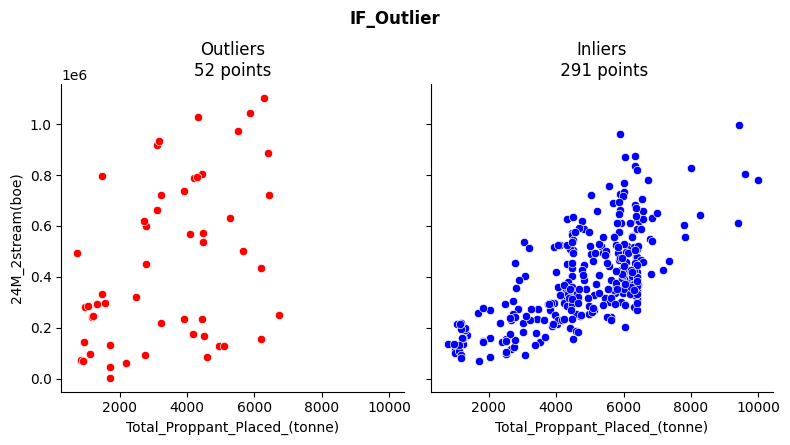

In [ ]:
g = sns.FacetGrid(workingdf, col='IF_anomaly', height=4, hue='IF_anomaly', hue_order=[1,-1], palette=['#0100FF','#FF0000'])
g.map(sns.scatterplot, 'Total_Proppant_Placed_(tonne)', '24M_2stream(boe)')
g.fig.suptitle('IF_Outlier', y=1.10, fontweight='bold')

axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(workingdf[workingdf['IF_anomaly']== -1])} points")
axes[1].set_title(f"Inliers\n {len(workingdf[workingdf['IF_anomaly']==  1])} points")

plt.show()

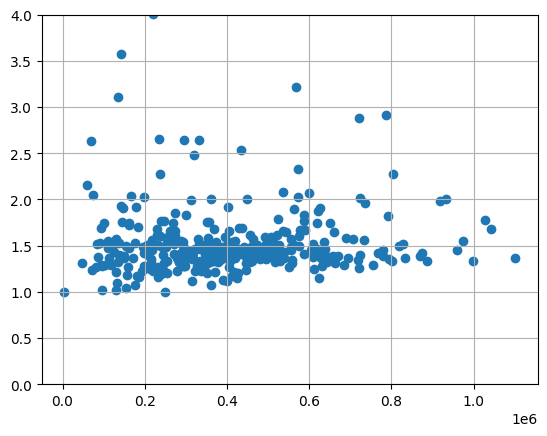

In [ ]:
# Prod_rate_24_12 = workingdf['24M_2stream(boe)']/workingdf['12M_2stream(boe)']


plt.scatter(workingdf['24M_2stream(boe)'], workingdf['24/12M_Prod_2stream'])
plt.ylim(0,4)
plt.grid()
plt.show()

# Input/Target feature 설정

In [ ]:
# # inlier만 선택할 경우
workingdf = workingdf.loc[workingdf['IF_anomaly']==1]

Input = workingdf.drop(['36M_Prod_Hour(hr)', '12M_2stream(boe)','24M_2stream(boe)', '36M_2stream(boe)','24/12M_Prod_2stream','24/12M_Prod_hr','24M_Prod/Completed_Length(boe/m)','24M_Prod/Total_Proppant_Placed_(tonne)','IF_anomaly_scores', 'IF_anomaly'], axis=1) #,'IF_anomaly_scores','IF_anomaly'
# Input = workingdf.drop(['12M_Prod_Hour(hr)','36M_Prod_Hour(hr)', '12M_Gas(mcf)','24M_Gas(mcf)', '36M_Gas(mcf)','IF_anomaly_scores', 'IF_anomaly'], axis=1) #,'IF_anomaly_scores','IF_anomaly'

Target = workingdf[['24M_2stream(boe)']].copy()
# Target = workingdf[['24M_Gas(mcf)']].copy()

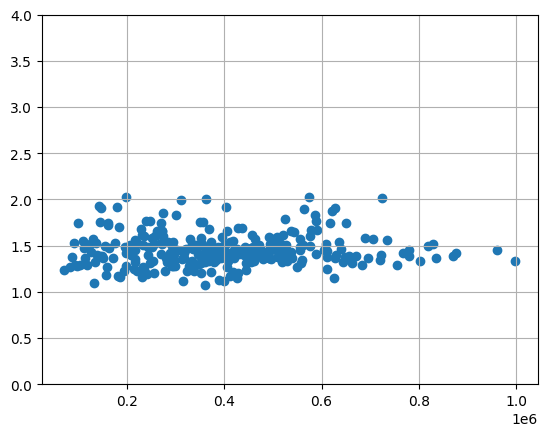

In [ ]:
# Prod_rate_24_12 = workingdf['24M_2stream(boe)']/workingdf['12M_2stream(boe)']

plt.scatter(workingdf['24M_2stream(boe)'], workingdf['24/12M_Prod_2stream'])
plt.ylim(0,4)
plt.grid()
plt.show()

In [ ]:
Input.columns

Index(['MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Load_Fluid_(m3)',
       'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
       '24M_Prod_Hour(hr)'],
      dtype='object')

# HOC 자료 세팅

In [ ]:
df_2 = pd.read_excel(r'HOC Montney frac info_1.xlsx', thousands = ',')
df_2.columns = df_2.columns.str.replace(" ", "_") # column 제목에 공백 있어서 언더바로 대체
summary = pd.DataFrame(df_2.dtypes, columns= ['Dtype'])
summary['Null'] = df_2.isnull().sum()
summary['N_unique'] = df_2.nunique()
summary['1st_Value'] = df_2.iloc[0]
summary['2nd_Value'] = df_2.iloc[1]
summary['Last_Value'] = df_2.iloc[-1]
summary

,Dtype,Null,N_unique,1st_Value,2nd_Value,Last_Value
UWI,object,0,11,100/10-19-064-06W6/00,100/16-19-064-06W6/02,103/04-01-065-06W6/02
Area,object,0,1,AB,AB,AB
Well_Status,object,0,1,Pump GAS,Pump GAS,Pump GAS
Org_Operator_Name,object,0,2,Harvest Oprtns Corp,Hoc Enrg Corp,Harvest Oprtns Corp
Reported_Operator,object,0,1,Harvest Operations Corp.,Harvest Operations Corp.,Harvest Operations Corp.
...,...,...,...,...,...,...
Cal_Day_Avg_@_Month_18_CND_(m3/d),float64,8,3,NaN,NaN,0.01
Cal_Day_Avg_@_Month_18_FLUID_(m3/d),float64,0,11,10.86,20.62,5.58
Cal_Day_Avg_@_Month_18_GAS/Stage_(e3m3/d),float64,0,10,1.03,1.03,0.85
Cal_Day_Avg_@_Month_18_OIL/Stage_(m3/d),float64,11,0,NaN,NaN,NaN


In [ ]:
df_3 = pd.read_csv(r'HOC Montney Production2.csv', thousands = ',') # 시추공별 누적 생산량 정보. df_2 자료에 추가 열로 붙여줌
df_3.columns = df_3.columns.str.replace(" ", "_") # column 제목에 공백 있어서 언더바로 대체
df_3.columns

Index(['Unique_Well_ID', 'Well_Name', 'Field_Code', 'Field_Name', 'Pool_Code',
       'Pool_Name', 'Status_Code', 'Status_Description',
       'Current_Operator_Code', 'Current_Operator_Name',
       ...
       'PRD_Percent:_WTR_Cut_%', 'PRD_Percent:_OIL_Cut_%',
       'PRD_Percent:_Cum_WTR_Cut_%', 'PRD_Percent:_Plant_Gas_Yield_%',
       'PRD_Percent:_Total_Liquid_Weighting_%',
       'PRD_$OIL:_Edmonton_Par_$CdnBbl', 'PRD_$OIL:_Heavy_Hardisty_$CdnBbl',
       'PRD_$OIL:_Refinery_Acquisition_$CdnBbl', 'PRD_$GAS:_AB_Border_$CdnMcf',
       'PRD_$GAS:_AB_Reference_$CdnMcf'],
      dtype='object', length=156)

In [ ]:
# 2-stream 월산량 계산
df_3['Monthly_2stream(boe)'] = df_3['PRD_Monthly_GAS_Mcf']/6 + df_3['PRD_Monthly_CND_Bbl'] # 6000cf = 1boe 가정

In [ ]:
# 12/24/36개월 누적 생산시간 계산
df_3['12M_Prod_Hour(hr)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_HRS_hrs'].transform(lambda x: x.iloc[:12].sum())
df_3['24M_Prod_Hour(hr)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_HRS_hrs'].transform(lambda x: x.iloc[:24].sum())
df_3['36M_Prod_Hour(hr)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_HRS_hrs'].transform(lambda x: x.iloc[:36].sum())

In [ ]:
df_3['12M_2stream(boe)'] = df_3.groupby(['Unique_Well_ID'])['Monthly_2stream(boe)'].transform(lambda x: x.iloc[:12].sum())
df_3['24M_2stream(boe)'] = df_3.groupby(['Unique_Well_ID'])['Monthly_2stream(boe)'].transform(lambda x: x.iloc[:24].sum())
df_3['36M_2stream(boe)'] = df_3.groupby(['Unique_Well_ID'])['Monthly_2stream(boe)'].transform(lambda x: x.iloc[:36].sum())

# df_3['12M_Gas(mcf)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_GAS_Mcf'].transform(lambda x: x.iloc[:12].sum())
# df_3['24M_Gas(mcf)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_GAS_Mcf'].transform(lambda x: x.iloc[:24].sum())
# df_3['36M_Gas(mcf)'] = df_3.groupby(['Unique_Well_ID'])['PRD_Monthly_GAS_Mcf'].transform(lambda x: x.iloc[:36].sum())

In [ ]:
# 생산량 비율 계산
df_3['24/12M_Prod_2stream'] = df_3['24M_2stream(boe)']/df_3['12M_2stream(boe)']


# 생산시간 비율 계산
df_3['24/12M_Prod_hr'] = df_3['24M_Prod_Hour(hr)']/df_3['12M_Prod_Hour(hr)']

In [ ]:
df_3 = df_3[['Unique_Well_ID','12M_Prod_Hour(hr)','24M_Prod_Hour(hr)','36M_Prod_Hour(hr)','12M_2stream(boe)', '24M_2stream(boe)','36M_2stream(boe)','24/12M_Prod_2stream','24/12M_Prod_hr']]
# df_3 = df_3[['Unique_Well_ID','12M_Prod_Hour(hr)','24M_Prod_Hour(hr)','36M_Prod_Hour(hr)','12M_Gas(mcf)', '24M_Gas(mcf)','36M_Gas(mcf)']]

df_3 = df_3.drop_duplicates().reset_index(drop=True)
df_3.drop(df_3[df_3['Unique_Well_ID'] == '100/02-13-064-07W6/00'].index, inplace=True)
# df_3.drop(df_3[df_3['Unique_Well_ID'] == '100/16-19-064-06W6/02'].index, inplace=True)
# df_3.drop(df_3[df_3['Unique_Well_ID'] == '102/04-29-064-06W6/00'].index, inplace=True)

df_3.reset_index(drop=True, inplace=True)
df_3

,Unique_Well_ID,12M_Prod_Hour(hr),24M_Prod_Hour(hr),36M_Prod_Hour(hr),12M_2stream(boe),24M_2stream(boe),36M_2stream(boe),24/12M_Prod_2stream,24/12M_Prod_hr
0,100/10-19-064-06W6/00,7951,16475,24980,212426.266667,310822.316667,381356.433333,1.463201,2.072066
1,100/16-19-064-06W6/02,1642,9585,17561,36008.666667,108177.250000,141424.650000,3.004200,5.837393
2,102/16-19-064-06W6/00,8150,16511,23715,75544.300000,106004.983333,125259.750000,1.403216,2.025890
3,100/01-28-064-06W6/02,4593,13040,21656,49172.600000,85978.683333,108412.333333,1.748508,2.839103
4,100/02-28-064-06W6/00,7324,15813,24527,56938.550000,89682.300000,112052.383333,1.575072,2.159066
5,102/04-29-064-06W6/00,2162,9268,17012,48848.650000,111943.316667,151295.600000,2.291636,4.286772
6,100/01-01-065-06W6/00,6273,14181,22284,90233.900000,133488.883333,164882.450000,1.479365,2.260641
7,100/02-01-065-06W6/00,7980,13343,20850,121493.966667,151180.766667,177938.850000,1.244348,1.672055
8,102/02-01-065-06W6/00,5894,13261,21034,66697.733333,89142.900000,109365.400000,1.336521,2.249915
9,100/03-01-065-06W6/00,1917,8045,16555,42937.666667,86048.050000,106224.500000,2.004022,4.196661


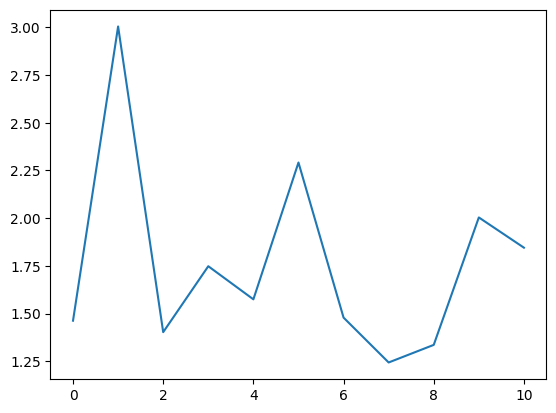

In [ ]:
plt.plot(df_3['24/12M_Prod_2stream'])

In [ ]:
df_2.drop(df_2[df_2['UWI'] == '100/02-13-064-07W6/00'].index, inplace=True)
# df_2.drop(df_2[df_2['UWI'] == '100/16-19-064-06W6/02'].index, inplace=True)
# df_2.drop(df_2[df_2['UWI'] == '102/04-29-064-06W6/00'].index, inplace=True)
df_2.reset_index(drop=True, inplace=True)
df_2

,UWI,Area,Well_Status,Org_Operator_Name,Reported_Operator,Cur_Operator_Name,Lic/WA/WID/Permit_#,Date_Well_Spudded,Comp_Year,Comp_Start_Date,...,Cal_Day_Avg_@_Month_12_OIL/Stage_(m3/d),Cal_Day_Avg_@_Month_12_FLUID/Stage_(m3/d),Cal_Day_Avg_@_Month_18_GAS_(e3m3/d),Cal_Day_Avg_@_Month_18_OIL_(m3/d),Cal_Day_Avg_@_Month_18_WTR_(m3/d),Cal_Day_Avg_@_Month_18_CND_(m3/d),Cal_Day_Avg_@_Month_18_FLUID_(m3/d),Cal_Day_Avg_@_Month_18_GAS/Stage_(e3m3/d),Cal_Day_Avg_@_Month_18_OIL/Stage_(m3/d),Cal_Day_Avg_@_Month_18_FLUID/Stage_(m3/d)
0,100/10-19-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,477257,2016-01-18,2017,2016-11-22,...,NaN,NaN,46.26,NaN,10.86,NaN,10.86,1.03,NaN,0.24
1,100/16-19-064-06W6/02,AB,Pump GAS,Hoc Enrg Corp,Harvest Operations Corp.,Harvest Oprtns Corp,476682,2015-09-06,2015,2015-11-18,...,NaN,NaN,34.09,NaN,20.62,NaN,20.62,1.03,NaN,0.62
2,102/16-19-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,477256,2015-11-20,2017,2016-11-22,...,NaN,NaN,14.81,NaN,3.95,NaN,3.95,0.71,NaN,0.19
3,100/01-28-064-06W6/02,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,467003,2014-07-18,2014,2014-10-02,...,NaN,NaN,18.01,NaN,1.48,NaN,1.48,1.13,NaN,0.09
4,100/02-28-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,467004,2014-10-03,2015,2014-12-03,...,NaN,NaN,14.85,NaN,4.34,NaN,4.34,0.93,NaN,0.27
5,102/04-29-064-06W6/00,AB,Pump GAS,Hoc Enrg Corp,Harvest Operations Corp.,Harvest Oprtns Corp,475814,2015-07-08,2015,2015-09-27,...,NaN,NaN,30.56,NaN,19.07,NaN,19.07,1.02,NaN,0.64
6,100/01-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,487379,2018-03-23,2018,2018-07-05,...,NaN,NaN,18.15,NaN,8.01,0.00,8.01,0.52,NaN,0.23
7,100/02-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,480696,2016-10-18,2017,2016-11-28,...,NaN,NaN,18.52,NaN,4.82,NaN,4.82,0.64,NaN,0.17
8,102/02-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,487380,2018-02-17,2018,2018-06-05,...,NaN,NaN,4.58,NaN,3.18,0.13,3.18,0.13,NaN,0.09
9,100/03-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,469043,2014-12-03,2015,2015-01-30,...,NaN,NaN,13.50,NaN,1.35,NaN,1.35,0.84,NaN,0.08


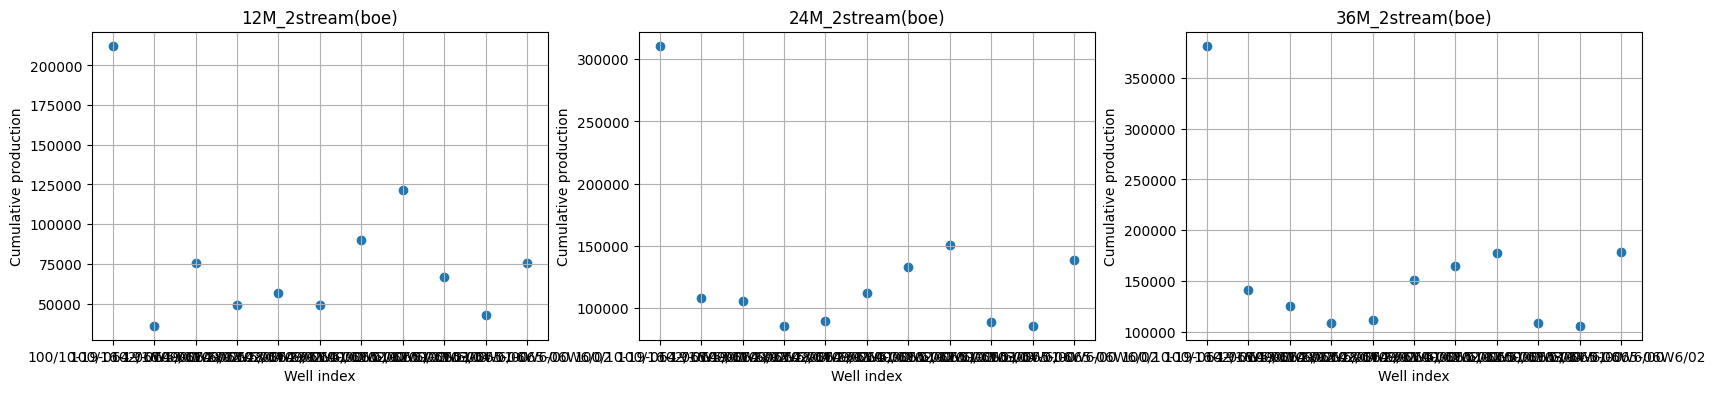

In [ ]:
prod = ['12M_2stream(boe)','24M_2stream(boe)','36M_2stream(boe)']
# prod = ['12M_Gas(mcf)', '24M_Gas(mcf)','36M_Gas(mcf)']

fig, ax = plt.subplots(1,3, figsize=(20,4))

for i in range(3):
  ax[i].scatter(df_3['Unique_Well_ID'], df_3[prod[i]])
  ax[i].set_title(prod[i])
  ax[i].set_xlabel('Well index')
  ax[i].set_ylabel('Cumulative production')
  ax[i].grid()
plt.show()

In [ ]:
HOC_workingdf = pd.concat([df_2, df_3], axis = 1)
HOC_workingdf = HOC_workingdf.drop('Unique_Well_ID', axis = 1)

In [ ]:
df_2

,UWI,Area,Well_Status,Org_Operator_Name,Reported_Operator,Cur_Operator_Name,Lic/WA/WID/Permit_#,Date_Well_Spudded,Comp_Year,Comp_Start_Date,...,Cal_Day_Avg_@_Month_12_OIL/Stage_(m3/d),Cal_Day_Avg_@_Month_12_FLUID/Stage_(m3/d),Cal_Day_Avg_@_Month_18_GAS_(e3m3/d),Cal_Day_Avg_@_Month_18_OIL_(m3/d),Cal_Day_Avg_@_Month_18_WTR_(m3/d),Cal_Day_Avg_@_Month_18_CND_(m3/d),Cal_Day_Avg_@_Month_18_FLUID_(m3/d),Cal_Day_Avg_@_Month_18_GAS/Stage_(e3m3/d),Cal_Day_Avg_@_Month_18_OIL/Stage_(m3/d),Cal_Day_Avg_@_Month_18_FLUID/Stage_(m3/d)
0,100/10-19-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,477257,2016-01-18,2017,2016-11-22,...,NaN,NaN,46.26,NaN,10.86,NaN,10.86,1.03,NaN,0.24
1,100/16-19-064-06W6/02,AB,Pump GAS,Hoc Enrg Corp,Harvest Operations Corp.,Harvest Oprtns Corp,476682,2015-09-06,2015,2015-11-18,...,NaN,NaN,34.09,NaN,20.62,NaN,20.62,1.03,NaN,0.62
2,102/16-19-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,477256,2015-11-20,2017,2016-11-22,...,NaN,NaN,14.81,NaN,3.95,NaN,3.95,0.71,NaN,0.19
3,100/01-28-064-06W6/02,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,467003,2014-07-18,2014,2014-10-02,...,NaN,NaN,18.01,NaN,1.48,NaN,1.48,1.13,NaN,0.09
4,100/02-28-064-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,467004,2014-10-03,2015,2014-12-03,...,NaN,NaN,14.85,NaN,4.34,NaN,4.34,0.93,NaN,0.27
5,102/04-29-064-06W6/00,AB,Pump GAS,Hoc Enrg Corp,Harvest Operations Corp.,Harvest Oprtns Corp,475814,2015-07-08,2015,2015-09-27,...,NaN,NaN,30.56,NaN,19.07,NaN,19.07,1.02,NaN,0.64
6,100/01-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,487379,2018-03-23,2018,2018-07-05,...,NaN,NaN,18.15,NaN,8.01,0.00,8.01,0.52,NaN,0.23
7,100/02-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,480696,2016-10-18,2017,2016-11-28,...,NaN,NaN,18.52,NaN,4.82,NaN,4.82,0.64,NaN,0.17
8,102/02-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,487380,2018-02-17,2018,2018-06-05,...,NaN,NaN,4.58,NaN,3.18,0.13,3.18,0.13,NaN,0.09
9,100/03-01-065-06W6/00,AB,Pump GAS,Harvest Oprtns Corp,Harvest Operations Corp.,Harvest Oprtns Corp,469043,2014-12-03,2015,2015-01-30,...,NaN,NaN,13.50,NaN,1.35,NaN,1.35,0.84,NaN,0.08


In [ ]:
# 단위 변환, 열 정리
HOC_workingdf['Reference_(KB)_Elev._(ft)'] = HOC_workingdf['Reference_(KB)_Elev._(m)']*3.28084
HOC_workingdf['MD_(All_Wells)_(ft)'] = HOC_workingdf['MD_(m)']*3.28084
HOC_workingdf['TVD_(ft)'] = HOC_workingdf['TVD_(m)']*3.28084
HOC_workingdf = HOC_workingdf.drop('Reference_(KB)_Elev._(m)', axis = 1)
HOC_workingdf = HOC_workingdf.drop('MD_(m)', axis = 1)
HOC_workingdf = HOC_workingdf.drop('TVD_(m)', axis = 1)

In [ ]:
print('HOC_Compted_Lengh(m)',np.round(HOC_workingdf['Completed_Length_(m)'].mean(),1))
print('Reference wells_Compted_Lengh(m)',np.round(Input['Completed_Length_(m)'].mean(),1))

HOC_Compted_Lengh(m) 1462.6
Reference wells_Compted_Lengh(m) 2347.7


In [ ]:
HOC_workingdf = HOC_workingdf[['MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Load_Fluid_(m3)',
       'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
       'Proppant_Composition', 'Proppant_Name_1', 'Proppant_Size_1',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)', '24M_Prod_Hour(hr)',
       '24M_2stream(boe)']]





# HOC_workingdf = HOC_workingdf[['Reference_(KB)_Elev._(ft)',
#        'MD_(All_Wells)_(ft)', 'TVD_(ft)',
#        'Total_Proppant_Placed_(tonne)',
#        'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
#        'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
#        'Completed_Length_(m)', 'Avg_Frac_Spacing_(m)', 'Load_Fluid_(m3)',
#        'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
#        'Avg_Proppant_1_Placed_(tonne)', 'Total_Proppant_1_Placed_(tonne)',
#        'Total_Ceramic_Proppant_Placed_(tonne)',
#        'Total_Sand_Proppant_Placed_(tonne)', '24M_Prod_Hour(hr)', '24M_Gas(mcf)']]


In [ ]:
# HOC_workingdf = pd.get_dummies(HOC_workingdf)
# HOC_workingdf.columns

In [ ]:
HOC_workingdf_input = HOC_workingdf[['MD_(All_Wells)_(ft)', 'TVD_(ft)', 'Total_Proppant_Placed_(tonne)',
       'Avg_Proppant_Placed_per_Stage_(tonne)', 'Total_Fluid_Pumped_(m3)',
       'Avg_Fluid_Pumped_per_Stage_(m3)', 'Stages_Actual',
       'Completed_Length_(m)', 'Load_Fluid_(m3)',
       'Avg_Fluid_Pumped_/_Meter_(m3)', 'Avg_Proppant_Placed_/_Meter_(tonne)',
       'Total_Ceramic_Proppant_Placed_(tonne)',
       'Total_Sand_Proppant_Placed_(tonne)', '12M_Prod_Hour(hr)',
       '24M_Prod_Hour(hr)']]


HOC_workingdf_target = HOC_workingdf[['24M_2stream(boe)']]
# HOC_workingdf_target = HOC_workingdf[['24M_Gas(mcf)']]

In [ ]:
# col_list = Input.columns

# new_col = []
# for i in col_list:
#   if i in list(HOC_workingdf.columns):
#     pass
#   else:
#     HOC_workingdf_input[i] = 0
#     new_col.append(i)
# print('newly added columns:', new_col)

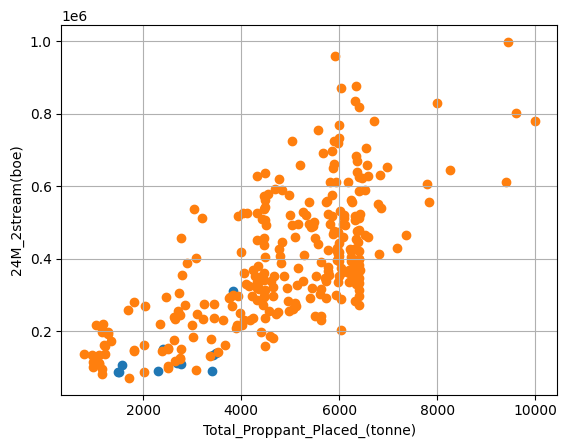

In [ ]:
plt.scatter (HOC_workingdf['Total_Proppant_Placed_(tonne)'], HOC_workingdf['24M_2stream(boe)'])
plt.scatter (workingdf['Total_Proppant_Placed_(tonne)'], workingdf['24M_2stream(boe)'])

# plt.scatter (HOC_workingdf_input['Total_Proppant_Placed_(tonne)'], HOC_workingdf_target['24M_Gas(mcf)'])
# plt.scatter (workingdf['Total_Proppant_Placed_(tonne)'], workingdf['24M_Gas(mcf)'])
plt.xlabel('Total_Proppant_Placed_(tonne)')
plt.ylabel('24M_2stream(boe)')
# plt.ylabel('24M_Gas(mcf)')

plt.grid()
plt.show()

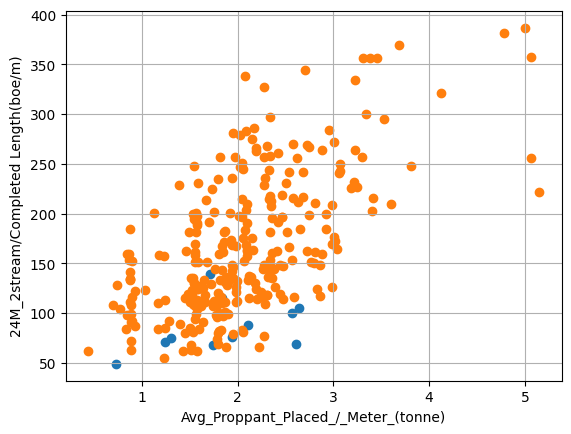

In [ ]:
plt.scatter (HOC_workingdf['Avg_Proppant_Placed_/_Meter_(tonne)'], HOC_workingdf['24M_2stream(boe)']/HOC_workingdf['Completed_Length_(m)'])
plt.scatter (workingdf['Avg_Proppant_Placed_/_Meter_(tonne)'], workingdf['24M_2stream(boe)']/workingdf['Completed_Length_(m)'])

# plt.scatter (HOC_workingdf_input['Total_Proppant_Placed_(tonne)'], HOC_workingdf_target['24M_Gas(mcf)'])
# plt.scatter (workingdf['Total_Proppant_Placed_(tonne)'], workingdf['24M_Gas(mcf)'])
plt.xlabel('Avg_Proppant_Placed_/_Meter_(tonne)')
plt.ylabel('24M_2stream/Completed Length(boe/m)')
# plt.ylabel('24M_Gas(mcf)')

plt.grid()
plt.show()

# 기본 Well data 와 HOC 데이터 합치기

In [ ]:
# Input = Input.reset_index(drop=True, inplace=True)
# HOC_workingdf_input = HOC_workingdf_input.reset_index(drop=True, inplace=True)

In [ ]:
Input_final = pd.concat([Input, HOC_workingdf_input], axis = 0)
Target_final = pd.concat([Target, HOC_workingdf_target], axis = 0)

In [ ]:
HOC_workingdf_input

,MD_(All_Wells)_(ft),TVD_(ft),Total_Proppant_Placed_(tonne),Avg_Proppant_Placed_per_Stage_(tonne),Total_Fluid_Pumped_(m3),Avg_Fluid_Pumped_per_Stage_(m3),Stages_Actual,Completed_Length_(m),Load_Fluid_(m3),Avg_Fluid_Pumped_/_Meter_(m3),Avg_Proppant_Placed_/_Meter_(tonne),Total_Ceramic_Proppant_Placed_(tonne),Total_Sand_Proppant_Placed_(tonne),12M_Prod_Hour(hr),24M_Prod_Hour(hr)
0,18822.17908,11181.102720,3837.65,85.28,17882.20,397.38,45,2239.05,17828.00,7.99,1.71,454.50,3383.15,7951,16475
1,17060.36800,10816.273312,2770.83,83.96,16290.40,493.65,33,1588.50,16290.41,10.26,1.74,273.73,2497.10,1642,9585
2,18526.90348,11165.354688,1573.54,74.93,7875.29,375.01,21,2165.16,7831.00,3.64,0.73,213.57,1359.97,8150,16511
3,14954.06872,10660.105328,1484.10,92.76,5967.03,372.94,16,1142.57,6002.00,5.22,1.30,202.20,1281.90,4593,13040
4,15823.49132,10679.462284,2301.42,143.84,9567.28,597.96,16,1189.20,9562.66,8.05,1.94,240.08,2061.34,7324,15813
5,15738.18948,10819.554152,2697.20,89.91,13475.10,449.17,30,1278.34,13475.10,10.54,2.11,247.90,2449.30,2162,9268
6,15242.78264,9967.848088,3423.93,97.83,15615.80,446.17,35,1332.80,15667.99,11.72,2.57,334.50,3089.43,6273,14181
7,15456.03724,10145.013448,2414.70,83.27,12564.10,433.24,29,1310.55,12564.10,9.59,1.84,2069.10,345.60,7980,13343
8,14983.59628,9989.829716,3401.55,100.05,14623.70,430.11,34,1301.40,15356.00,11.24,2.61,340.66,3060.89,5894,13261
9,15820.21048,10162.073816,1502.97,93.94,6720.60,420.04,16,1216.40,6735.10,5.52,1.24,168.26,1334.71,1917,8045


In [ ]:
# 변수 갯수 늘리기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(Input_final)
Input_final=poly.transform(Input_final)

print('Input shape:',Input_final.shape)


Input shape: (302, 135)


In [ ]:
HOC_workingdf_input

,MD_(All_Wells)_(ft),TVD_(ft),Total_Proppant_Placed_(tonne),Avg_Proppant_Placed_per_Stage_(tonne),Total_Fluid_Pumped_(m3),Avg_Fluid_Pumped_per_Stage_(m3),Stages_Actual,Completed_Length_(m),Load_Fluid_(m3),Avg_Fluid_Pumped_/_Meter_(m3),Avg_Proppant_Placed_/_Meter_(tonne),Total_Ceramic_Proppant_Placed_(tonne),Total_Sand_Proppant_Placed_(tonne),12M_Prod_Hour(hr),24M_Prod_Hour(hr)
0,18822.17908,11181.102720,3837.65,85.28,17882.20,397.38,45,2239.05,17828.00,7.99,1.71,454.50,3383.15,7951,16475
1,17060.36800,10816.273312,2770.83,83.96,16290.40,493.65,33,1588.50,16290.41,10.26,1.74,273.73,2497.10,1642,9585
2,18526.90348,11165.354688,1573.54,74.93,7875.29,375.01,21,2165.16,7831.00,3.64,0.73,213.57,1359.97,8150,16511
3,14954.06872,10660.105328,1484.10,92.76,5967.03,372.94,16,1142.57,6002.00,5.22,1.30,202.20,1281.90,4593,13040
4,15823.49132,10679.462284,2301.42,143.84,9567.28,597.96,16,1189.20,9562.66,8.05,1.94,240.08,2061.34,7324,15813
5,15738.18948,10819.554152,2697.20,89.91,13475.10,449.17,30,1278.34,13475.10,10.54,2.11,247.90,2449.30,2162,9268
6,15242.78264,9967.848088,3423.93,97.83,15615.80,446.17,35,1332.80,15667.99,11.72,2.57,334.50,3089.43,6273,14181
7,15456.03724,10145.013448,2414.70,83.27,12564.10,433.24,29,1310.55,12564.10,9.59,1.84,2069.10,345.60,7980,13343
8,14983.59628,9989.829716,3401.55,100.05,14623.70,430.11,34,1301.40,15356.00,11.24,2.61,340.66,3060.89,5894,13261
9,15820.21048,10162.073816,1502.97,93.94,6720.60,420.04,16,1216.40,6735.10,5.52,1.24,168.26,1334.71,1917,8045


# 훈련/테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(Input_final, Target_final, test_size=0.20, shuffle=True, random_state=13)

In [ ]:
print('train_scale',train_input.shape)

train_scale (241, 135)


# 정규화

In [ ]:
# 변수 특성간 영향 표준화 (input)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


ss = MinMaxScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print('train_scale',train_scaled.shape)

ss_target = MinMaxScaler()
ss_target.fit(train_target)
train_target_scaled = ss_target.transform(train_target)
test_target_scaled = ss_target.transform(test_target)

train_scale (241, 135)


In [ ]:
# train_input.columns

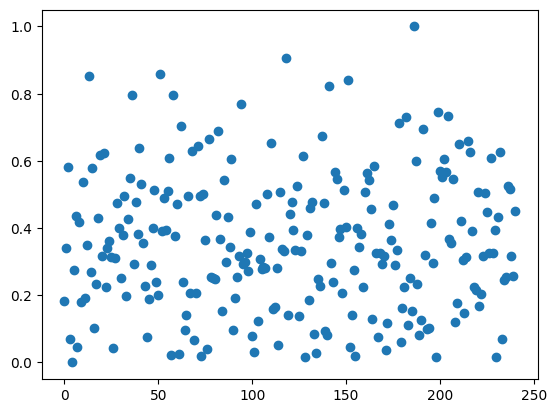

In [ ]:
plt.scatter(range(0,len(train_target_scaled)), train_target_scaled)

# 머신러닝 모델 수립

In [ ]:
from tensorflow import keras
from keras import layers, optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
activation = 'relu' #'leaky_relu'


def DNN():
  keras.backend.clear_session()
  model=keras.models.Sequential()
  # model.add(keras.layers.Dense(4096, activation=activation))
  # model.add(keras.layers.Dense(2048, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1024, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(512, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(256, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(128, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(64, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(32, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(16, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(8, activation=activation))
  # model.add(keras.layers.Dropout(0.2))
  # model.add(keras.layers.Dense(4, activation=activation))
  model.add(keras.layers.Dense(1))

  model.compile(loss="mse", optimizer=opt)

  return model

In [ ]:
# Model hyperparameters
opt = optimizers.Adam(learning_rate = 0.0002)

epoc = 5000
bat = 64
val_split = 0.20
early_stop = EarlyStopping(monitor = 'val_loss', patience = 500)
checkpoint = ModelCheckpoint('best-model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# Training
model = DNN()
history = model.fit(train_scaled, train_target_scaled, epochs=epoc, batch_size=bat, validation_split = val_split ,callbacks=[checkpoint, early_stop], verbose=0)


Epoch 1: val_loss improved from inf to 0.14034, saving model to best-model.h5

Epoch 2: val_loss improved from 0.14034 to 0.10241, saving model to best-model.h5

Epoch 3: val_loss improved from 0.10241 to 0.06020, saving model to best-model.h5

Epoch 4: val_loss improved from 0.06020 to 0.02355, saving model to best-model.h5

Epoch 5: val_loss did not improve from 0.02355

Epoch 6: val_loss did not improve from 0.02355

Epoch 7: val_loss improved from 0.02355 to 0.02117, saving model to best-model.h5

Epoch 8: val_loss did not improve from 0.02117

Epoch 9: val_loss improved from 0.02117 to 0.02051, saving model to best-model.h5

Epoch 10: val_loss improved from 0.02051 to 0.01953, saving model to best-model.h5

Epoch 11: val_loss improved from 0.01953 to 0.01898, saving model to best-model.h5

Epoch 12: val_loss improved from 0.01898 to 0.01867, saving model to best-model.h5

Epoch 13: val_loss improved from 0.01867 to 0.01744, saving model to best-model.h5

Epoch 14: val_loss did no

2/2 [==============================] - 0s 11ms/step


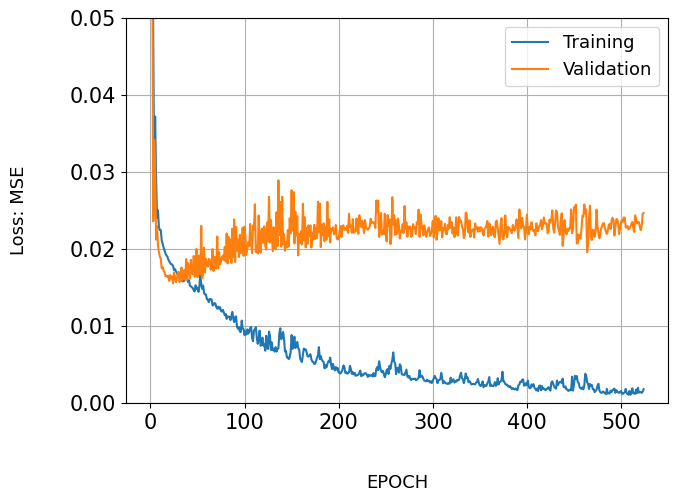

Early stopping (Stopped Epoch): 524


In [ ]:

#예측
model.evaluate(test_scaled, test_target)
train_predictions = model.predict(train_scaled)
test_predictions = model.predict(test_scaled)



import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH',fontsize=13, labelpad=30)
plt.ylabel('Loss: MSE', fontsize=13, labelpad=30)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim((0,0.05))
plt.legend(['Training','Validation'],fontsize=13)
plt.grid()
plt.show()

print("Early stopping (Stopped Epoch):",early_stop.stopped_epoch)



print("====================================")

In [ ]:
model.save('DNN_best.h5')

from keras.models import load_model
model = load_model('DNN_best.h5')

In [ ]:
train_target_ori= ss_target.inverse_transform(train_target_scaled)
test_target_ori= ss_target.inverse_transform(test_target_scaled)

train_predictions_ori = ss_target.inverse_transform(train_predictions)
test_predictions_ori = ss_target.inverse_transform(test_predictions)



train_target_ori = pd.DataFrame(train_target_ori)
train_target_ori.index = train_target_ori.index
test_target_ori = pd.DataFrame(test_target_ori)
test_target_ori.index = test_target_ori.index

train_predictions_ori = pd.DataFrame(train_predictions_ori)
train_predictions_ori.index = train_predictions_ori.index
test_predictions_ori = pd.DataFrame(test_predictions_ori)
test_predictions_ori.index = test_predictions_ori.index




train data_mae: 49112.728890401675
test data_mae: 95651.37572290529
train data_r2: 0.8520479455166027
test data_r2: 0.631252439349504
train data_mse: 5689483812.97509
test data_mse: 14971876603.711905
train data_rmse: 75428.66705023422
test data_rmse: 122359.61998842553
Train data: 241 samples


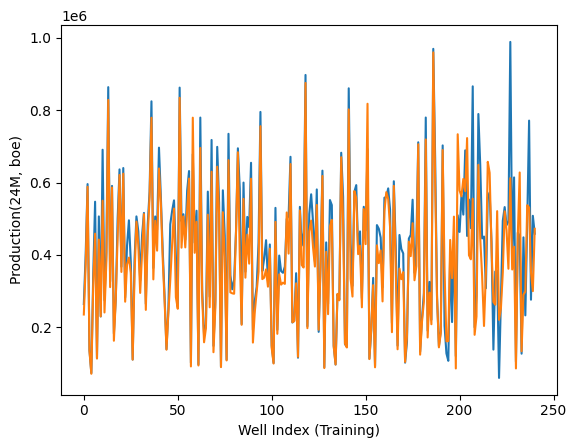

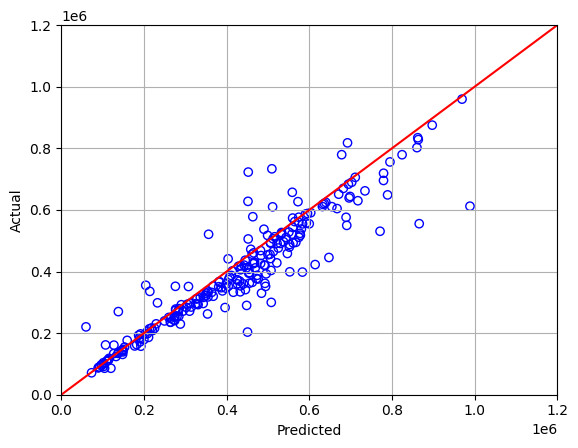

test data: 61 samples


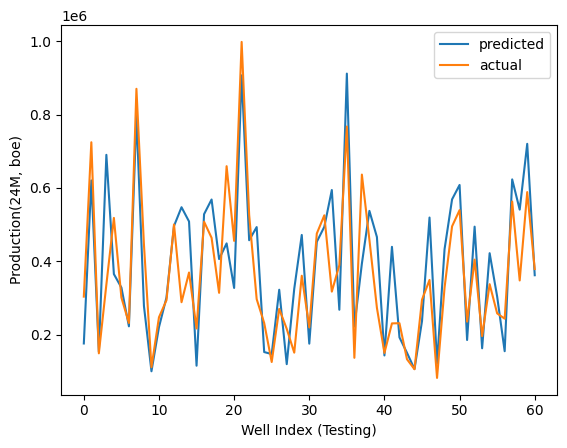

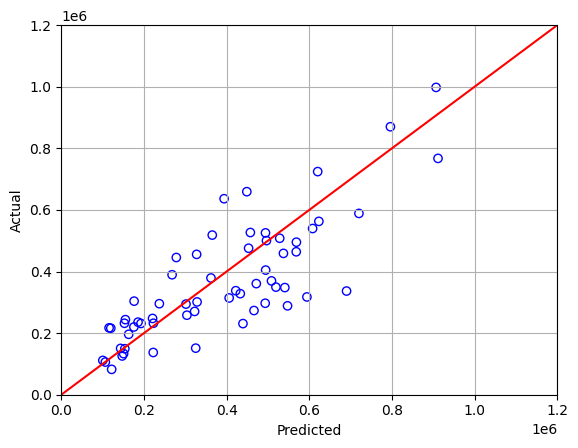

In [ ]:


print("====================================")
# 절대 오차 구하기: 예측 소닉 과 실제 소닉 간의 차이 (평균)
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(train_predictions_ori,train_target_ori)
print("train data_mae:",mae_train)
mae_test = mean_absolute_error(test_predictions_ori,test_target_ori)
print("test data_mae:",mae_test)



print("====================================")
# R2 구하기:
from sklearn.metrics import r2_score
r2_train = r2_score(train_predictions_ori,train_target_ori)
print("train data_r2:", r2_train)
r2_test = r2_score(test_predictions_ori,test_target_ori)
print("test data_r2:", r2_test)



print("====================================")
# mse 구하기: 주의! 에러가 1보다 작으면 값이 mae 보다 더 작아지는 왜곡 효과 발생
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_predictions_ori,train_target_ori)
print("train data_mse:", mse_train)
mse_test = mean_squared_error(test_predictions_ori,test_target_ori)
print("test data_mse:", mse_test)


print("====================================")
# rmse 구하기: 주의! 에러가 1보다 작으면 값이 mae 보다 더 작아지는 왜곡 효과 발생
import numpy as np
print("train data_rmse:", np.sqrt(mse_train))
print("test data_rmse:", np.sqrt(mse_test))



graph_upper_lim= 1200000

# 그래프
import matplotlib.pyplot as plt
print(f"Train data: {len(train_predictions_ori)} samples")
plt.plot(train_predictions_ori, label='predicted')
plt.plot(train_target_ori, label = 'actual')
plt.ylabel("Production(24M, boe)")
plt.xlabel("Well Index (Training)")
plt.show()

plt.scatter(train_predictions_ori, train_target_ori,  c='none', edgecolor='b')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim([0,graph_upper_lim])
plt.ylim([0,graph_upper_lim])
plt.plot([0,graph_upper_lim],[0,graph_upper_lim], color='red')
plt.grid()
plt.show()


print(f"test data: {len(test_predictions_ori)} samples")
plt.plot(test_predictions_ori, label='predicted')
plt.plot(test_target_ori, label='actual')
plt.ylabel("Production(24M, boe)")
plt.xlabel("Well Index (Testing)")
plt.legend()
plt.show()

plt.scatter(test_predictions_ori, test_target_ori, c='none', edgecolor='b')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim([0,graph_upper_lim])
plt.ylim([0,graph_upper_lim])
plt.plot([0,graph_upper_lim],[0,graph_upper_lim], color='red')
plt.grid()

plt.show()